In [25]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

run_name = 'large_run_with_ideal'
df_random = pd.read_csv("data/" + run_name + "/run_number0.csv")
df_random_mixed_pop = pd.read_csv("data/" + run_name + "/run_number1.csv")
df_MultG2 = pd.read_csv("data/" + run_name + "/run_number2.csv")
df_MultG2_mixed_pop = pd.read_csv("data/" + run_name + "/run_number3.csv")
df_MultG6 = pd.read_csv("data/" + run_name + "/run_number4.csv")
df_MultG6_mixed_pop = pd.read_csv("data/" + run_name + "/run_number5.csv")
df_noisy = pd.read_csv("data/" + run_name + "/run_number6.csv")
df_noisy_mixed_pop = pd.read_csv("data/" + run_name + "/run_number7.csv")

pd.set_option('display.max_columns', None)
# df.head()

datasets = {
    'Random': df_random,
    'Random_mixed_pop': df_random_mixed_pop,
    'MultG2': df_MultG2,
    'MultG2_mixed_pop': df_MultG2_mixed_pop,
    'MultG6': df_MultG6,
    'MultG6_mixed_pop': df_MultG6_mixed_pop,
    'Noisy2': df_noisy,
    'Noisy2_mixed_pop': df_noisy_mixed_pop
}

In [26]:
def plot_smt(name, datasets_dict):
    """
    datasets_dict: dictionary with {label: dataframe} pairs
    """
    curiosities = sorted(list(set().union(*[df["initial_curiosity"].unique() for df in datasets_dict.values()])))
    
    for label, df in datasets_dict.items():
        avg_values = [df[df["initial_curiosity"]==c][name].mean() for c in curiosities]
        std_values = [df[df["initial_curiosity"]==c][name].std() for c in curiosities]
        p_temp = plt.errorbar(curiosities, avg_values, yerr=std_values, fmt='-o', label=label)
        if np.isnan(avg_values[0]):
            plt.hlines(avg_values[5], xmin = 0, xmax = 1,color = p_temp[0].get_color(), linestyles=":")
    
    plt.xlabel("Initial Curiosity")
    plt.ylabel(name)
    plt.title(f"{name} vs Initial Curiosity")
    plt.legend()
    plt.grid()
    plt.show()

### Key performance parameter: Share of explored knowledge

These plots show the share of knowledge harvested (first plot) and explore the relative speed of harvesting (second and third plot).

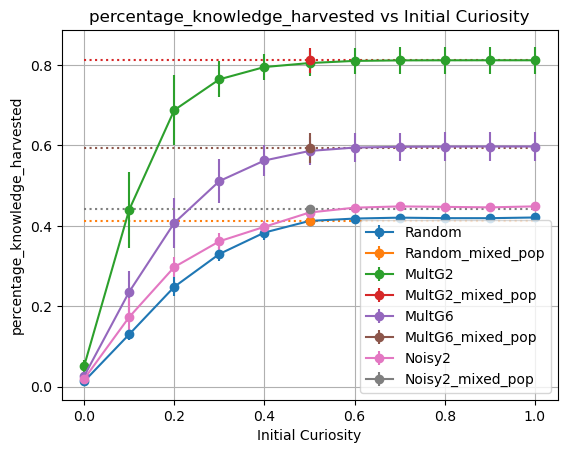

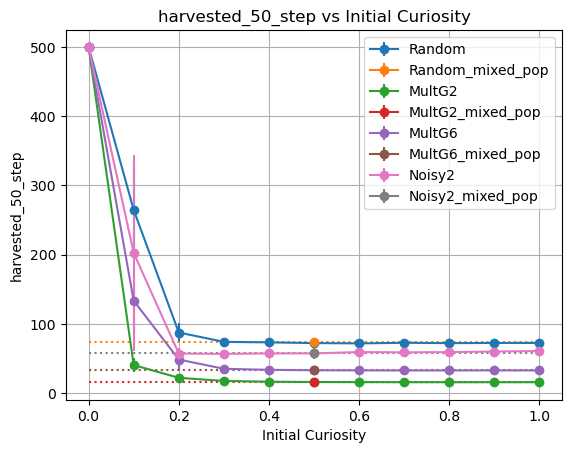

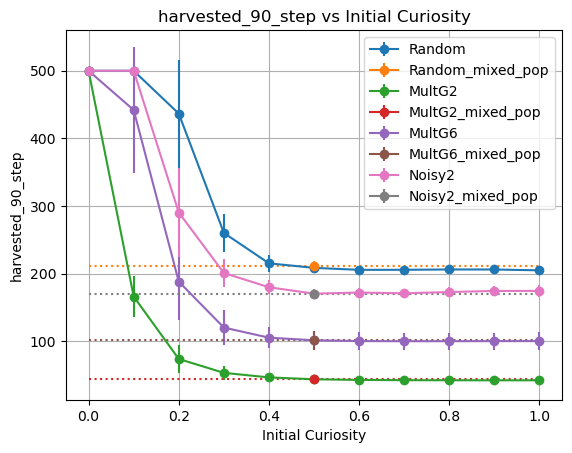

In [27]:
plot_smt("percentage_knowledge_harvested", datasets)
plot_smt("harvested_50_step", datasets)
plot_smt("harvested_90_step", datasets)

### Descriptive parameters

For now this includes top shares of prestige to understand the accumulation of (perceived) scientific merit.

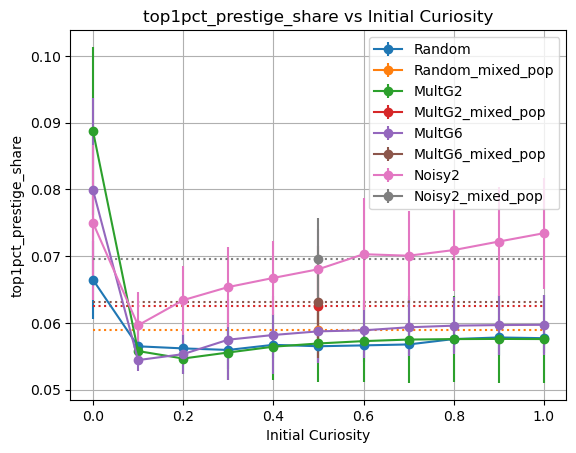

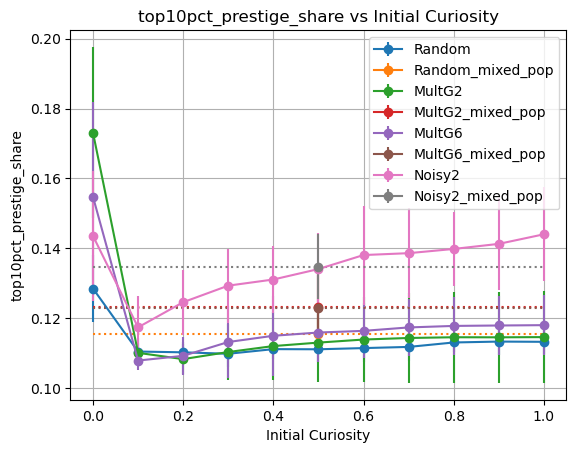

In [28]:
plot_smt("top1pct_prestige_share", datasets)
plot_smt("top10pct_prestige_share", datasets)

### Secondary performance parameter: Share of tiles touched (+ weighted version)

These plots show the share of (weighted vs. unweighted) tiles touched (first plot) and explore the relative speed of harvesting (second and third plot).

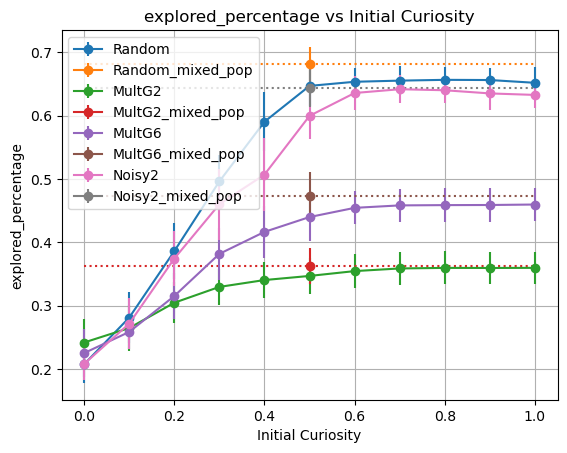

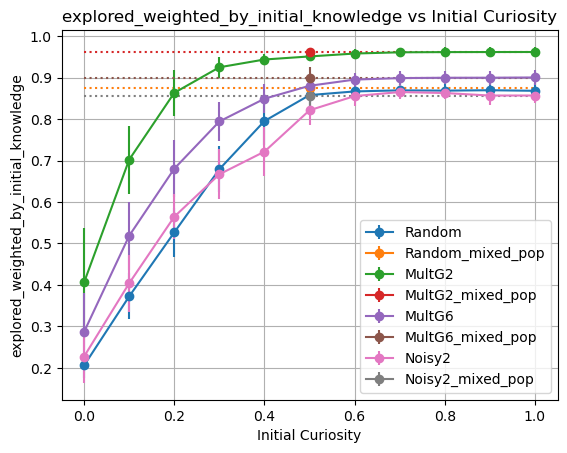

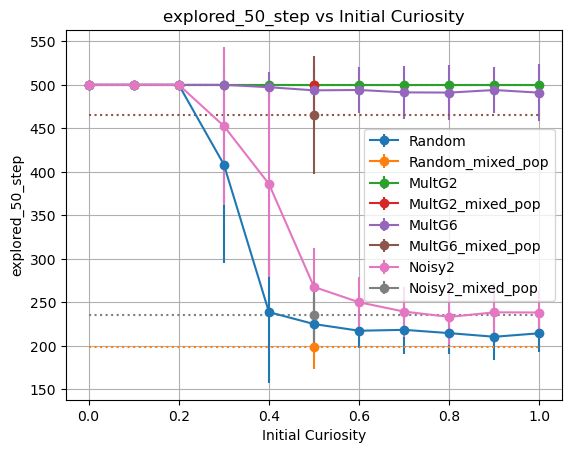

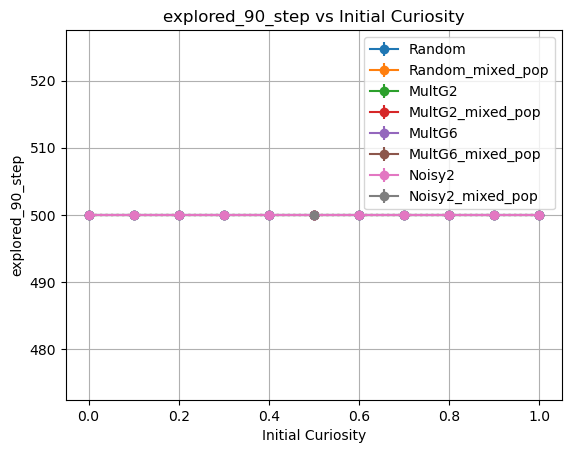

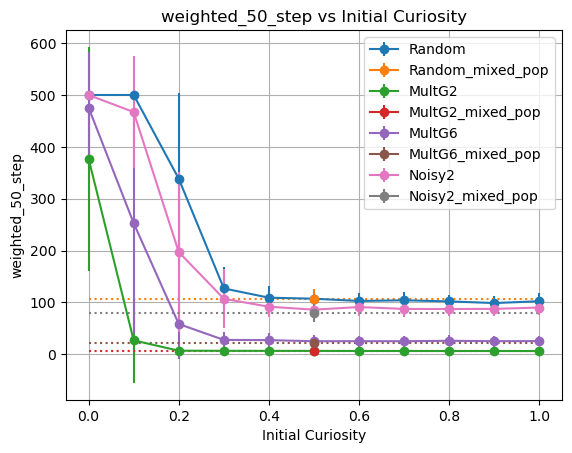

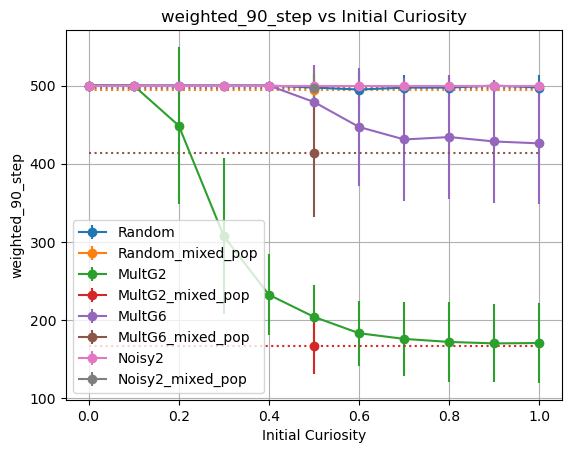

In [29]:
plot_smt("explored_percentage", datasets)
plot_smt("explored_weighted_by_initial_knowledge", datasets)
plot_smt("explored_50_step", datasets)
plot_smt("explored_90_step", datasets)
plot_smt("weighted_50_step", datasets)
plot_smt("weighted_90_step", datasets)

### Additional Parameters

Finally this section includes two plots showing average agent knowledge and remaining knowledge, which for now rather serve as a sanity check.

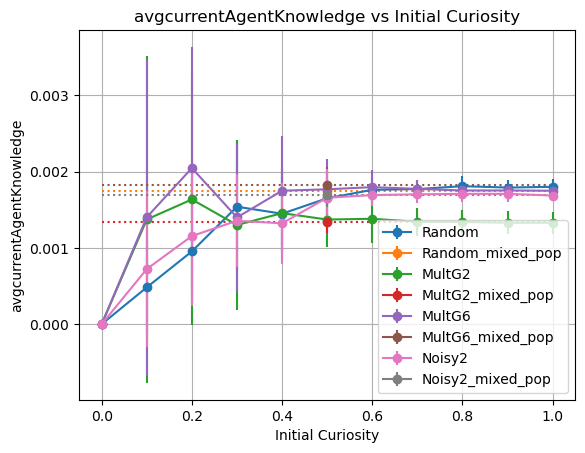

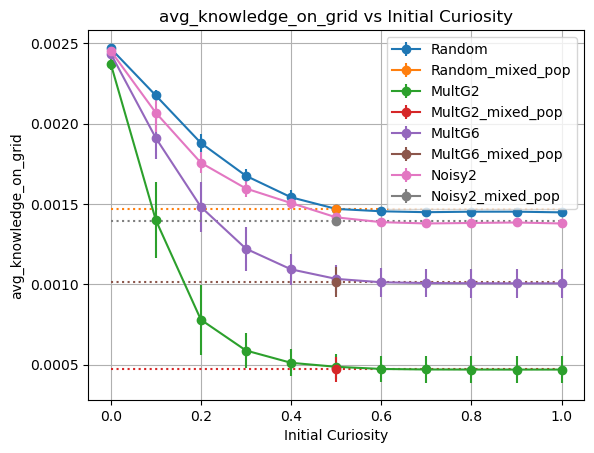

In [30]:
plot_smt("avgcurrentAgentKnowledge", datasets)
plot_smt("avg_knowledge_on_grid", datasets)




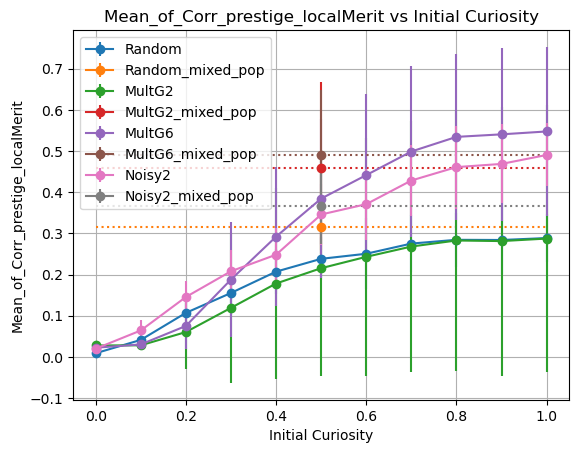

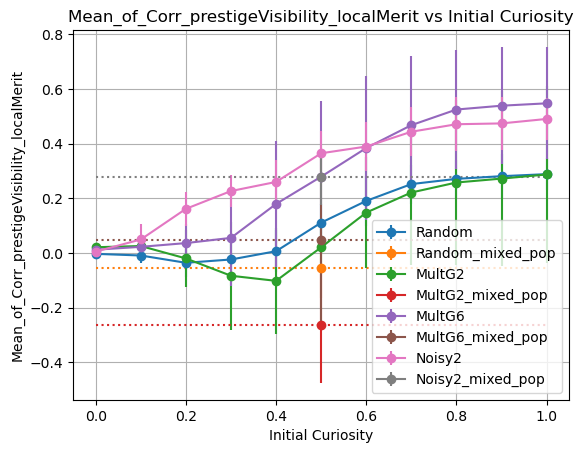

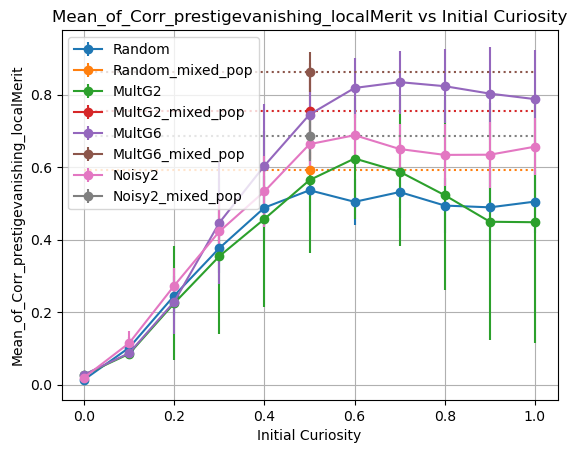

In [31]:
plot_smt("Mean_of_Corr_prestige_localMerit", datasets)
plot_smt("Mean_of_Corr_prestigeVisibility_localMerit", datasets)
plot_smt("Mean_of_Corr_prestigevanishing_localMerit", datasets)

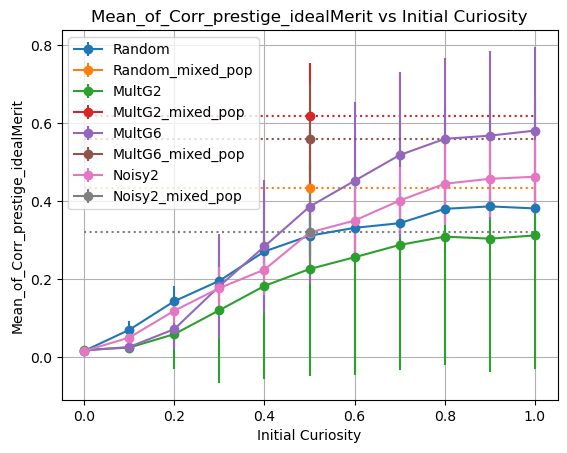

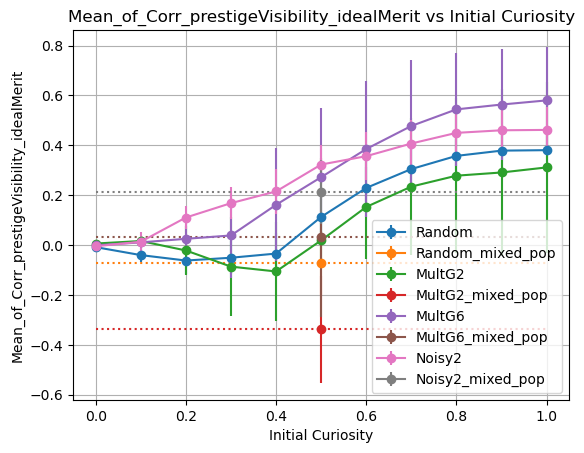

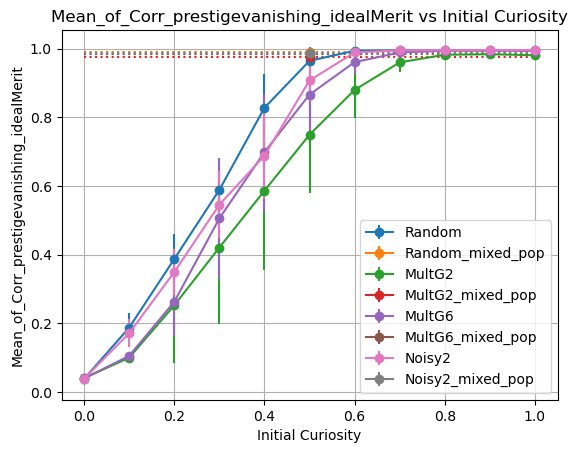

In [32]:
plot_smt("Mean_of_Corr_prestige_idealMerit", datasets)
plot_smt("Mean_of_Corr_prestigeVisibility_idealMerit", datasets)
plot_smt("Mean_of_Corr_prestigevanishing_idealMerit", datasets)